#### 1. On craigslist search for “Toyota Camry” and select search 100 miles from your location.
#### 2. Get the URL and utilize Beautiful Soup to build a data frame with the parsed data from your search.
#### 3. Your data frame should look like this example, with Description, Location, Price, and Year (when each data point is not available, use “null” numpy.nan).

In [1]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np

all_descriptions = []
all_locations = []
all_prices = []
all_years = []

for page in range(4):
    try:
        url = f"https://boston.craigslist.org/search/cta?postal=02134&query=Toyota%20Camry&search_distance=100#search=1~list~{page}~0"
        response = requests.get(url)

        if response.status_code == 200:
            html_content = response.text
            print('Page received')
        else:
            print(f"Failed to retrieve page: {response.status_code}")

        soup = BeautifulSoup(html_content, 'html.parser')

        scripts = soup.find_all('script', type='application/ld+json')

        for script in scripts:
            try:
                json_data = json.loads(script.string)
                if 'itemListElement' in json_data:
                    items = json_data['itemListElement']
                    for item in items:
                        product_info = item.get('item', {})
                        # print(f"Name: {product_info.get('name')}")
                        description = product_info.get('name')
                        all_descriptions.append(description)
                        if 'offers' in product_info:
                            # print(f"Price: {product_info['offers'].get('price')}")
                            all_prices.append(float(product_info['offers'].get('price')))
                        if 'availableAtOrFrom' in product_info.get('offers', {}):
                            location = product_info['offers']['availableAtOrFrom'].get('address', {})
                            # print(f"Location: {location.get('addressLocality')}")
                            all_locations.append(location.get('addressLocality'))
                        year_match = re.search(r'\b(19|20)\d{2}\b', description)
                        year = int(year_match.group(0)) if year_match else np.nan
                        all_years.append(year)
                        # print('-' * 30)
            except json.JSONDecodeError:
                continue
    except Exception as e:
        print(f"Error on page {page + 1}: {e}")

data = {
    'Description': all_descriptions,
    'Location': all_locations,
    'Price': all_prices,
    'Year': all_years
}

df = pd.DataFrame(data)

print(f"Total number of listings: {len(df)}")

df

Page received
Page received
Page received
Page received
Total number of listings: 1016


,Description,Location,Price,Year
0,Selling My 2007 Toyota Camry,Brewster,4500.0,2007.0
1,For sale by owner 2006 Toyota Camry LE NO acci...,Holyoke,1266.0,2006.0
2,2009 Toyota Camry LE,Seekonk,4000.0,2009.0
3,2005 Toyota Camry LE,Raynham Center,3995.0,2005.0
4,2018 Toyota Camry XLE V6,Methuen,23995.0,2018.0
...,...,...,...,...
1011,2015 Chevrolet Equinox LT~AWD~102K Miles~Relia...,East Windsor,7995.0,2015.0
1012,2013 GMC Sierra 1500 SLE~4WD~5.3V8~99K Miles~C...,East Windsor,13995.0,2013.0
1013,2016 Scion iM 5dr HB CVT (Natl) Hatchback,Manchester,9969.0,2016.0
1014,2011 Chevrolet Equinox 2LT~AWD~3.0V6~140K~Chea...,East Windsor,4995.0,2011.0


#### 4. Replace the missing values in “Year” column with the median value of the “Year” column.

In [2]:
df['Year'] = df['Year'].fillna(df['Year'].median()).astype(int)
df

,Description,Location,Price,Year
0,Selling My 2007 Toyota Camry,Brewster,4500.0,2007
1,For sale by owner 2006 Toyota Camry LE NO acci...,Holyoke,1266.0,2006
2,2009 Toyota Camry LE,Seekonk,4000.0,2009
3,2005 Toyota Camry LE,Raynham Center,3995.0,2005
4,2018 Toyota Camry XLE V6,Methuen,23995.0,2018
...,...,...,...,...
1011,2015 Chevrolet Equinox LT~AWD~102K Miles~Relia...,East Windsor,7995.0,2015
1012,2013 GMC Sierra 1500 SLE~4WD~5.3V8~99K Miles~C...,East Windsor,13995.0,2013
1013,2016 Scion iM 5dr HB CVT (Natl) Hatchback,Manchester,9969.0,2016
1014,2011 Chevrolet Equinox 2LT~AWD~3.0V6~140K~Chea...,East Windsor,4995.0,2011


#### 5. Plot the scatter plot for “Year” vs “Price”.

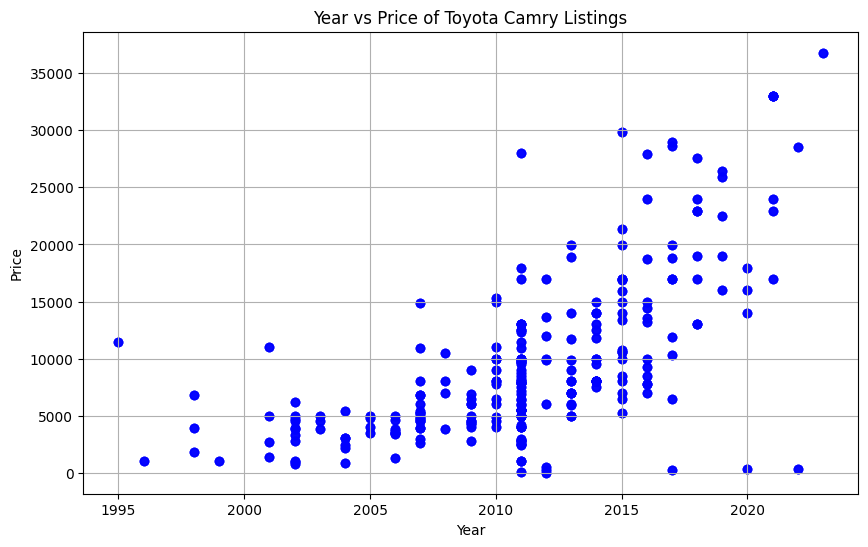

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Price'], color='blue', alpha=0.6)
plt.title('Year vs Price of Toyota Camry Listings')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#### 6. Get the Pearson Correla>on between “Year” and “Price”.

In [4]:
pearson_corr = df['Year'].corr(df['Price'])
print(f"Pearson Correlation between Year and Price: {pearson_corr}")

Pearson Correlation between Year and Price: 0.6383754220979747
